# Digital Humanities 140 Final Project
## An Analysis of F. Scott Fitzgerald's *The Great Gatsby*
#### Muthu Palaniappan, Winter 2023

This should include a description of your data, a link to the source(s) of your data, your motivation for looking at the data, and the question(s) that you are seeking to address.
For my final project, I will be analyzing the novel *The Great Gatsby* by F. Scott Fitzgerald. The [source](https://www.gutenberg.org/cache/epub/64317/pg64317.txt) for my project is The Gutenberg Project, which has provided the text of the novel. 

Fitzgerald's *The Great Gatsby* is my favorite novel, and I first read it in a high school English class. I was enamored by the themes of love and the American dream as well as the lively setting and time period. During my first read of the book, I analyzed the texts from a literary standpoint. Now, I hope to perform the same analysis from a digital humanities perspective using data science. I would like to explore the themes of the novel by analyzing word frequencies and sentiment. I also plan to look into the role certain characters play in portraying themes of the Roaring Twenties. 

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [2]:
target_url = "https://www.gutenberg.org/cache/epub/64317/pg64317.txt"
response = requests.get(target_url)
gatsby_string = response.text
gatsby_string = gatsby_string.split('*** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***')[1]
gatsby_string = gatsby_string.split('*** END OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***')[0]
gatsby_string = gatsby_string.lower()


In [4]:
stopwords_list = stopwords.words('english')
# print(stopwords_list)
sia = vader.SentimentIntensityAnalyzer()

In [5]:
gatsby_word_list = [w for w in word_tokenize(gatsby_string.lower())]

In [6]:
reviewPolarity = 0.0
pos_list = []
neg_list = []
for word in gatsby_word_list:
  val = sia.polarity_scores(word)['compound']
  if val > 0:
    pos_list.append(word)
  elif val < 0:
    neg_list.append(word)
print(pos_list[0:10])
print(neg_list[0:10])

['great', 'lover', 'lover', 'like', 'advantages', 'great', 'curious', 'matter', 'hope', 'tolerance']
['cry', 'vulnerable', 'criticizing', 'victim', 'bores', 'accused', 'hostile', 'missing', 'forget', 'snobbishly']


In [7]:
top15_pos = nltk.FreqDist(pos_list).most_common(15)
top15_neg = nltk.FreqDist(neg_list).most_common(15)

print(top15_pos)
print(top15_neg)

[('like', 119), ('hand', 63), ('want', 59), ('well', 53), ('good', 30), ('great', 26), ('love', 24), ('god', 20), ('matter', 19), ('loved', 19), ('friend', 18), ('party', 18), ('won', 17), ('better', 17), ('bright', 16)]
[('no', 97), ('miss', 38), ('cried', 31), ('alone', 25), ('demanded', 24), ('broke', 23), ('stopped', 19), ('hard', 17), ('shook', 17), ('crazy', 14), ('stop', 13), ('bad', 11), ('leave', 11), ('lost', 11), ('killed', 11)]


In [8]:
no_stopwords = [w for w in word_tokenize(gatsby_string.lower()) if w not in stopwords_list]

reviewPolarity = 0.0
pos_list = []
neg_list = []
for word in no_stopwords:
  val = sia.polarity_scores(word)['compound']
  if val > 0:
    pos_list.append(word)
  elif val < 0:
    neg_list.append(word)
top15_pos = nltk.FreqDist(pos_list).most_common(15)
top15_neg = nltk.FreqDist(neg_list).most_common(15)

print(top15_pos)
print(top15_neg)

[('like', 119), ('hand', 63), ('want', 59), ('well', 53), ('good', 30), ('great', 26), ('love', 24), ('god', 20), ('matter', 19), ('loved', 19), ('friend', 18), ('party', 18), ('better', 17), ('bright', 16), ('yes', 16)]
[('miss', 38), ('cried', 31), ('alone', 25), ('demanded', 24), ('broke', 23), ('stopped', 19), ('hard', 17), ('shook', 17), ('crazy', 14), ('stop', 13), ('bad', 11), ('leave', 11), ('lost', 11), ('killed', 11), ('dead', 11)]


In [9]:
stemmer = PorterStemmer()
unstemmed = [w for w in word_tokenize(gatsby_string.lower()) if w not in stopwords_list]
stemmed = []
for word in unstemmed:
  stemmed.append(stemmer.stem(word))

reviewPolarity = 0.0
pos_list = []
neg_list = []
for word in stemmed:
  val = sia.polarity_scores(word)['compound']
  if val > 0:
    pos_list.append(word)
  elif val < 0:
    neg_list.append(word)
top15_pos = nltk.FreqDist(pos_list).most_common(15)
top15_neg = nltk.FreqDist(neg_list).most_common(15)

print(top15_pos)
print(top15_neg)

[('like', 128), ('hand', 103), ('want', 97), ('love', 56), ('well', 53), ('good', 30), ('great', 26), ('laugh', 25), ('matter', 24), ('play', 24), ('friend', 24), ('reach', 23), ('smile', 22), ('care', 21), ('god', 20)]
[('miss', 42), ('stop', 35), ('demand', 28), ('broke', 23), ('hard', 17), ('shook', 17), ('drop', 14), ('kill', 12), ('bad', 11), ('lost', 11), ('dead', 11), ('forget', 10), ('low', 10), ('violent', 10), ('interrupt', 10)]


In [17]:
first_ch_string = 'In my younger and more vulnerable years'
second_ch_string ='About halfway between West Egg and New York the motor road hastily'
third_ch_string ='There was music from my neighbour’s house through the summer nights.'
fourth_ch_string = 'On Sunday morning while church bells'
fifth_ch_string = 'When I came home to West Egg that night'
sixth_ch_string = 'About this time an ambitious young reporter from New York'
seventh_ch_string ='It was when curiosity about Gatsby was at its highest'
eighth_ch_string = 'I couldn’t sleep all night; a foghorn'
ninth_ch_string = 'After two years I remember the rest of that day'

first_ch_index = gatsby_string.find(first_ch_string.lower())
second_ch_index = gatsby_string.find(second_ch_string.lower())
third_ch_index = gatsby_string.find(third_ch_string.lower())
fourth_ch_index = gatsby_string.find(fourth_ch_string.lower())
fifth_ch_index = gatsby_string.find(fifth_ch_string.lower())
sixth_ch_index = gatsby_string.find(sixth_ch_string.lower())
seventh_ch_index = gatsby_string.find(seventh_ch_string.lower())
eighth_ch_index = gatsby_string.find(eighth_ch_string.lower())
ninth_ch_index = gatsby_string.find(ninth_ch_string.lower())
print(first_ch_index)
print(second_ch_index)
print(third_ch_index)
print(fourth_ch_index)
print(fifth_ch_index)
print(sixth_ch_index)
print(seventh_ch_index)
print(eighth_ch_index)
print(ninth_ch_index)


531
34325
58543
91906
123277
147460
170873
221476
247570


<BarContainer object of 9 artists>

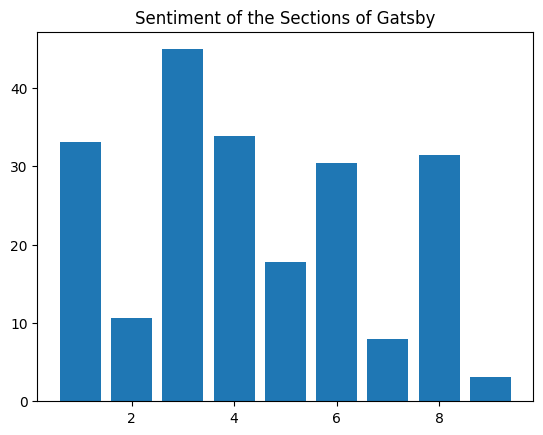

In [18]:
score_arr = []

gatsby_sections = []
gatsby_sections.append(gatsby_string[first_ch_index:second_ch_index])
gatsby_sections.append(gatsby_string[second_ch_index:third_ch_index])
gatsby_sections.append(gatsby_string[third_ch_index:fourth_ch_index])
gatsby_sections.append(gatsby_string[fourth_ch_index:fifth_ch_index])
gatsby_sections.append(gatsby_string[fifth_ch_index:sixth_ch_index])
gatsby_sections.append(gatsby_string[sixth_ch_index:seventh_ch_index])
gatsby_sections.append(gatsby_string[seventh_ch_index:eighth_ch_index])
gatsby_sections.append(gatsby_string[eighth_ch_index:ninth_ch_index])
gatsby_sections.append(gatsby_string[ninth_ch_index:])
for section in gatsby_sections:
  section_list = [w for w in word_tokenize(section.lower()) if w not in stopwords_list]
  score = 0
  for word in section_list:
    val = sia.polarity_scores(word)['compound']
    score += val
  score_arr.append(score)

x_coordinate = [ 1+i for i in range(len(score_arr)) ]
plt.title('Sentiment of the Sections of Gatsby')
plt.bar(x_coordinate, score_arr)


In [19]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

<BarContainer object of 9 artists>

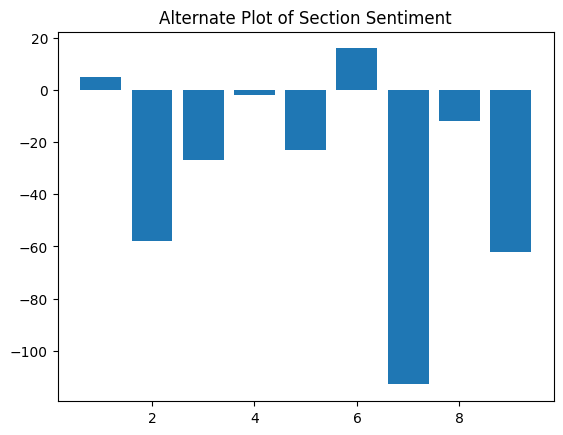

In [21]:
score_arr = []
for section in gatsby_sections:
  section_list = [w for w in word_tokenize(section.lower()) if w not in stopwords_list]
  score = 0
  for word in section_list:
    if word in positive_words:
      score += 1
    elif word in negative_words:
      score -= 1
  score_arr.append(score)

x_coordinate = [ 1+i for i in range(len(score_arr)) ]
plt.title('Alternate Plot of Section Sentiment') 
plt.bar(x_coordinate, score_arr)

In [23]:
import pandas as pd
x = [w for w in word_tokenize(gatsby_string.lower()) if w not in stopwords_list]
df = pd.DataFrame({'words': nltk.FreqDist(x).keys(),
                   'frequencies': nltk.FreqDist(x).values()})    

In [24]:
df.head()

,words,frequencies
0,great,26
1,gatsby,251
2,f.,1
3,scott,1
4,fitzgerald,1


In [30]:
names = ['gatsby', 'nick', 'daisy', 'tom', 'myrtle']
# df[df["words"] in names]
names_df = df.loc[df['words'].isin(names)]
names_df.head()

,words,frequencies
1,gatsby,251
590,tom,188
592,daisy,183
974,nick,24
1954,myrtle,23


<AxesSubplot: title={'center': 'Frequencies of Character Names'}, xlabel='words'>

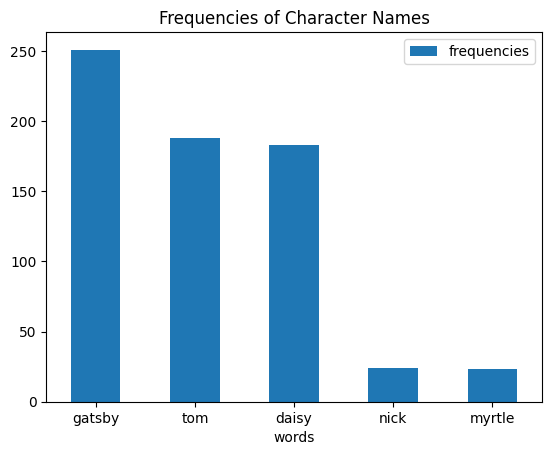

In [34]:

names_df.plot.bar(x='words', y='frequencies', rot=0, title='Frequencies of Character Names')

In [43]:
top10_pos_words = []
top10_neg_words = []
for i in range(10):
    top10_pos_words.append(top15_pos[i][0])
    top10_neg_words.append(top15_neg[i][0])
    
pos_df = df.loc[df['words'].isin(top10_pos_words)]
pos_df.head()


,words,frequencies
0,great,26
50,like,119
126,matter,19
769,hand,63
880,laugh,9


In [44]:
neg_df = df.loc[df['words'].isin(top10_neg_words)]
neg_df.head()

,words,frequencies
152,hard,17
899,miss,38
1020,drop,4
1149,broke,23
1225,bad,11


<AxesSubplot: title={'center': 'Frequencies of Top 10 Positive Words'}, xlabel='words'>

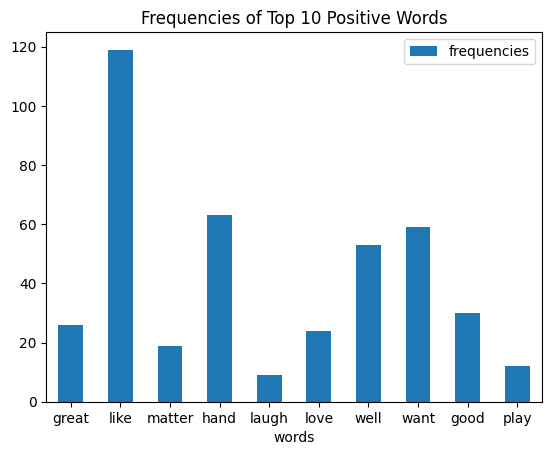

In [45]:
pos_df.plot.bar(x='words', y='frequencies', rot=0, title='Frequencies of Top 10 Positive Words')

<AxesSubplot: title={'center': 'Frequencies of Top 10 Negative Words'}, xlabel='words'>

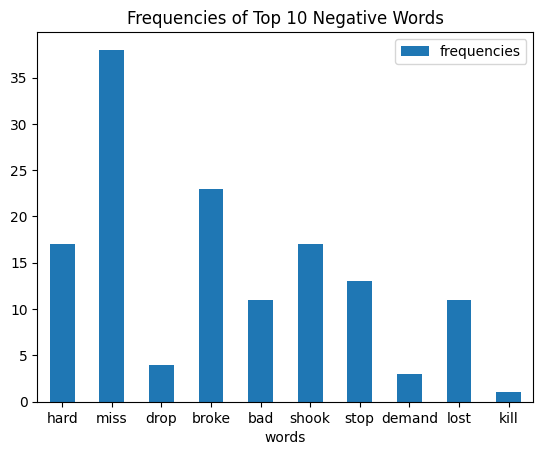

In [46]:
neg_df.plot.bar(x='words', y='frequencies', rot=0, title='Frequencies of Top 10 Negative Words')

# Analysis
I plan on analyzing the sentiment in each section of the book more deeply.
I also plan on looking at the word frequencies to see if I can learn about the motifs/themes of the novel.
I plan to make a few more plots to do with the presence of the positive/negative words in each section, the amount of times a character's name is mentioned in each section, the sentiment of the opening sentence of each section, and the top words of the novel. 